In [549]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [550]:
LOGFILES = {}
file_cnt = [0]

def get_next_id(file_cnt):
    id = file_cnt[0]
    file_cnt[0] += 1
    return id
    pass

def add_logfile(name):
    id = get_next_id(file_cnt)
    LOGFILES[id] = name
    print(f"File [{id}]: \"{name}\" ")
    pass

In [551]:
add_logfile("matecznego_2.json")
add_logfile("vid_4_2.json")
add_logfile("vid_1_2.json")
add_logfile("vid_3_2.json")
add_logfile("combined.json")

File [0]: "matecznego_2.json" 
File [1]: "vid_4_2.json" 
File [2]: "vid_1_2.json" 
File [3]: "vid_3_2.json" 
File [4]: "combined.json" 


In [552]:
FILE = 4
MINIMAL_LIFETIME_S = 5.0
MINIMAL_AVG_SPEED_PXS = 5.0
EXTENDED = True

In [553]:
lines = []
with open("data/" + LOGFILES[FILE]) as file:
    lines = file.readlines()
    pass

print(f"Read {len(lines)} lines")

Read 3178 lines


In [554]:
preprocessed = []

for line in lines:
    data = json.loads(line)
    data = data["data"]
    
    if( data["lifetime_s"] >= MINIMAL_LIFETIME_S and data["avg_speed"] >= MINIMAL_AVG_SPEED_PXS):
        preprocessed.append(data)
        pass
    
    pass

print(f"Reduced to {len(preprocessed)} entries")

Reduced to 657 entries


In [555]:
lifetimes = []
avg_speed = []
distance = []
x_vel = []
y_vel = []

for entry in preprocessed:
    lifetimes.append(entry["lifetime_s"])
    avg_speed.append(entry["avg_speed"])
    distance.append(entry["total_distance"])
    if(EXTENDED):
        x_vel.append(entry["avg_x_vel"])
        y_vel.append(entry["avg_y_vel"])
        pass
    
    pass

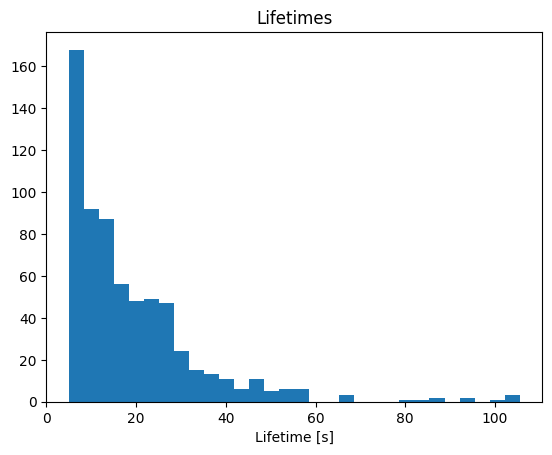

In [556]:
plt.figure()
plt.title("Lifetimes")
plt.xlabel("Lifetime [s]")
plt.hist(lifetimes, bins=30)
plt.show()

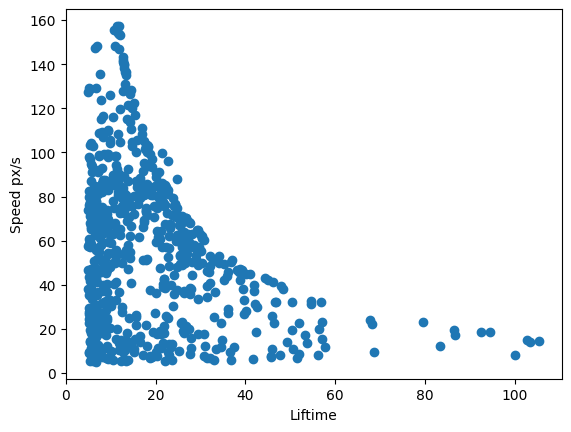

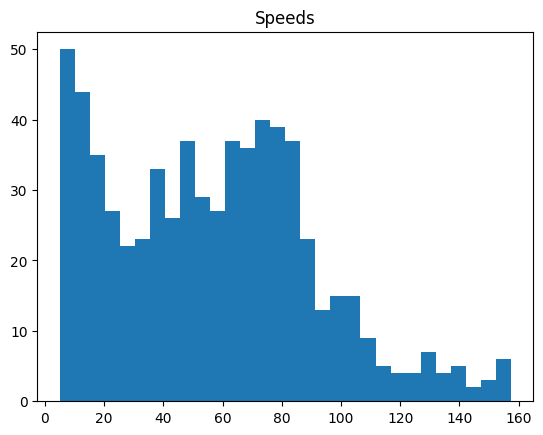

In [557]:
plt.figure()
plt.xlabel("Liftime [s]")
plt.ylabel("Speed px/s")
plt.scatter(lifetimes, avg_speed)
plt.show()

plt.figure()
plt.title("Speeds")
plt.hist(avg_speed, bins = 30)
plt.show()

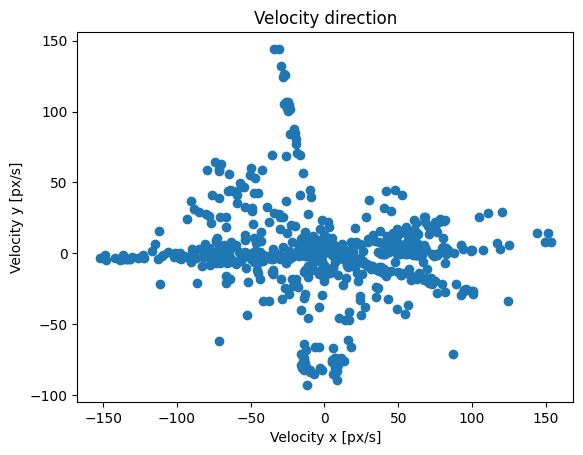

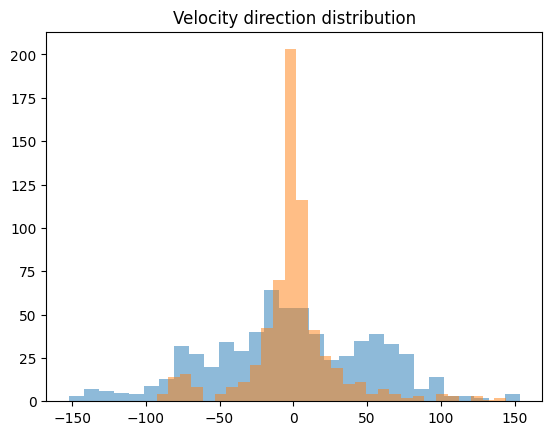

In [558]:
if(EXTENDED):
    plt.figure()
    plt.title("Velocity direction")
    plt.xlabel("Velocity x [px/s]")
    plt.ylabel("Velocity y [px/s]")
    plt.scatter(x_vel, y_vel)
    plt.show()

    plt.figure()
    plt.title("Velocity direction distribution")
    plt.hist(x_vel, bins = 30, alpha = 0.5)
    plt.hist(y_vel, bins = 30, alpha = 0.5)
    plt.show()
    pass


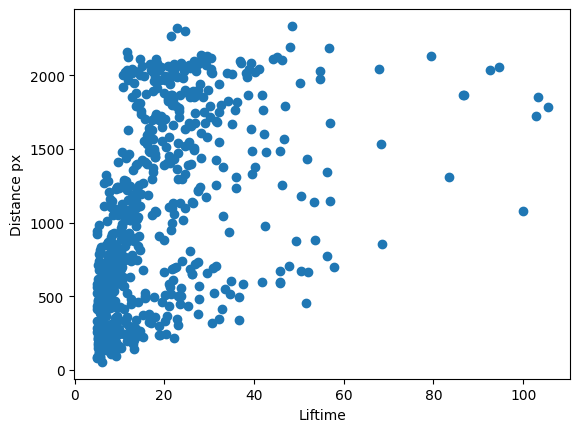

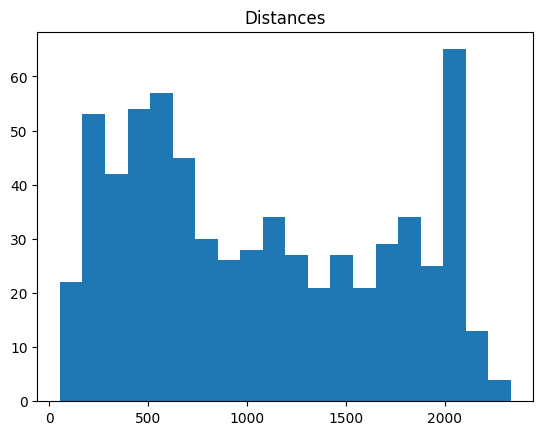

In [559]:
plt.figure()
plt.xlabel("Liftime")
plt.ylabel("Distance px")
plt.scatter(lifetimes, distance)
plt.show()

plt.figure()
plt.title("Distances")
plt.hist(distance, bins = 20)
plt.show()

In [560]:
# np_distance = np.array(distance)
# np_avg_speed = np.array(avg_speed)
# np_lifetimes = np.array(lifetimes)

# width = 1920
# height = 1080
# expected_distance = np.abs(width - height) + min(width, height)

# expected_lifetimes = expected_distance / np_avg_speed 
# print(len(expected_lifetimes))

# plt.figure()
# plt.xlabel("Liftime")
# plt.ylabel("Distance px")
# plt.scatter(np_lifetimes, expected_lifetimes)
# plt.show()

# plt.figure()
# plt.title("Expected lifetimes")
# plt.hist(np_lifetimes, bins = 30)
# plt.hist(expected_lifetimes, bins = 30)
# plt.show()